# import

In [17]:
# import
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder


import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

import plotly.graph_objects as go
from plotly.subplots import make_subplots

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline
# 마이너스 부호 떄문에 한글이 깨질 수가 있어 설정
plt.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')


In [18]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_pca.xlsx', index_col=0)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   korean_title        905 non-null    object        
 1   english_title       905 non-null    object        
 2   year                905 non-null    int64         
 3   total_season_num    905 non-null    int64         
 4   runtime             905 non-null    float64       
 5   genre               905 non-null    object        
 6   age_rating          905 non-null    object        
 7   production_country  905 non-null    object        
 8   critic_review       905 non-null    int64         
 9   season_1            905 non-null    object        
 10  season_2            266 non-null    object        
 11  season_3            136 non-null    object        
 12  season_4            79 non-null     object        
 13  season_5            49 non-null     object        
 14 

In [20]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [21]:
df['season_1'][0]

{'S1.E1': [8.2, 16000, 'Fri, Sep 17, 2021'],
 'S1.E2': [7.5, 14000, 'Fri, Sep 17, 2021'],
 'S1.E3': [8.0, 14000, 'Fri, Sep 17, 2021'],
 'S1.E4': [8.4, 14000, 'Fri, Sep 17, 2021'],
 'S1.E5': [7.6, 13000, 'Fri, Sep 17, 2021'],
 'S1.E6': [9.2, 23000, 'Fri, Sep 17, 2021'],
 'S1.E7': [7.9, 13000, 'Fri, Sep 17, 2021'],
 'S1.E8': [7.8, 13000, 'Fri, Sep 17, 2021'],
 'S1.E9': [7.5, 14000, 'Fri, Sep 17, 2021']}

In [22]:
# 연령 제한 숫자로 변환
df['age_rating'] = df['age_rating'].replace('ALL', 0).astype(int)

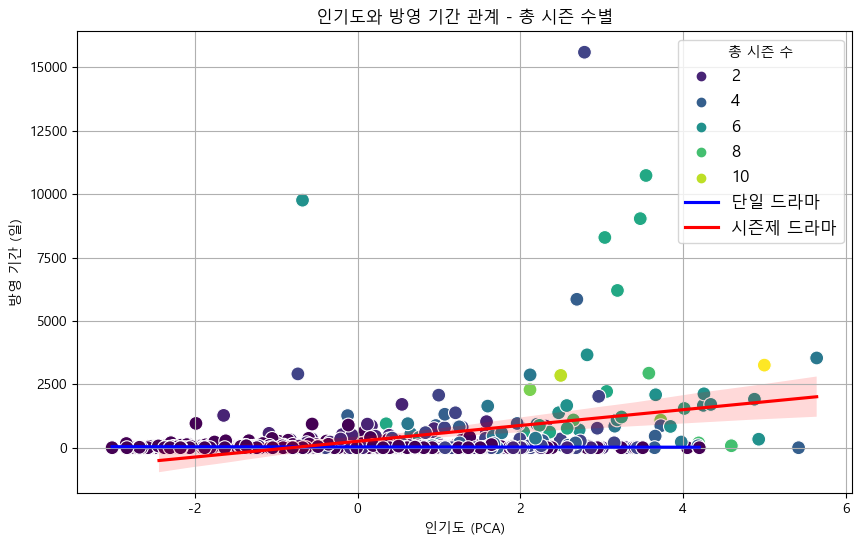

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준, 나눔 폰트 사용 예)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# scatterplot with hue
sns.scatterplot(x='pca', y='s1_gap_days', hue='total_season_num', data=df, palette='viridis', s=100)

# regplot for 1 season
sns.regplot(x='pca', y='s1_gap_days', data=df[df['total_season_num'] == 1], scatter=False, color='blue', label='단일 드라마')

# regplot for 2+ seasons
sns.regplot(x='pca', y='s1_gap_days', data=df[df['total_season_num'] >= 2], scatter=False, color='red', label='시즌제 드라마')

plt.title('인기도와 방영 기간 관계 - 총 시즌 수별')
plt.xlabel('인기도 (PCA)')
plt.ylabel('방영 기간 (일)')
plt.legend(title='총 시즌 수', fontsize='large')  # 범례 폰트 사이즈 조절
plt.grid(True)
plt.show()


## 범위가 큰 몇 컬럼들 log변환하여 최대한 정규화

In [25]:
# 'genre' 컬럼에 대해서만 문자열로 변환
df['genre'] = df['genre'].astype(str)

# '드라마' 항목 제거
df['genre'] = df['genre'].apply(lambda x: ', '.join([genre for genre in x.split(', ') if genre != '드라마']))

# unnest genre 열: 리스트를 풀어서 각 장르를 별도의 행으로 만듦
df = df.explode('genre')

In [26]:
# production_country 컬럼의 데이터를 처리하는 함수 정의
def process_countries(countries):
    # 쉼표를 기준으로 분리하고 첫 번째 나라 선택
    countries_list = countries.split(',')
    first_country = countries_list[0].strip()
    return first_country

# apply 함수를 사용하여 모든 행에 적용
df['production_country'] = df['production_country'].apply(process_countries)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   korean_title        905 non-null    object        
 1   english_title       905 non-null    object        
 2   year                905 non-null    int64         
 3   total_season_num    905 non-null    int64         
 4   runtime             905 non-null    float64       
 5   genre               905 non-null    object        
 6   age_rating          905 non-null    int32         
 7   production_country  905 non-null    object        
 8   critic_review       905 non-null    int64         
 9   season_1            905 non-null    object        
 10  season_2            266 non-null    object        
 11  season_3            136 non-null    object        
 12  season_4            79 non-null     object        
 13  season_5            49 non-null     object        
 14 

In [28]:
# genre 열의 각 항목을 쉼표로 분리하여 리스트로 변환
df['genre'] = df['genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# unnest genre 열: 리스트를 풀어서 각 장르를 별도의 행으로 만듦
df = df.explode('genre')

# 중복된 행 제거
df = df.drop_duplicates(subset=['english_title', 'production_country','runtime'])

# LabelEncoder를 사용하여 'production_country'와 'genre'을 레이블 인코딩
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['production_country'])

le_genre = LabelEncoder()
df['genre_encoded'] = le_genre.fit_transform(df['genre'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   korean_title        905 non-null    object        
 1   english_title       905 non-null    object        
 2   year                905 non-null    int64         
 3   total_season_num    905 non-null    int64         
 4   runtime             905 non-null    float64       
 5   genre               905 non-null    object        
 6   age_rating          905 non-null    int32         
 7   production_country  905 non-null    object        
 8   critic_review       905 non-null    int64         
 9   season_1            905 non-null    object        
 10  season_2            266 non-null    object        
 11  season_3            136 non-null    object        
 12  season_4            79 non-null     object        
 13  season_5            49 non-null     object        
 14 

### 시즌간의 term과 success_metric의 상관관계

In [30]:
# # 엑셀 파일을 읽어옵니다.
# df = pd.read_excel('../data/file/imdb_final_6.xlsx', index_col=0)

In [31]:
import pandas as pd
from datetime import datetime

# 시즌 컬럼 리스트 생성
season_columns = [f'season_{i}' for i in range(1, 18)]  # 시즌 1부터 시즌 17까지
season_gaps = []

for idx, row in df.iterrows():
    seasons = []

    # 시즌 데이터를 추출하여 리스트에 추가
    for season_col in season_columns:
        if season_col in row and pd.notnull(row[season_col]):
            season_data = row[season_col]
            seasons.append(season_data)

    # 시즌 간격을 계산
    if len(seasons) > 1:
        # 각 드라마에 대해 시즌 간격을 계산
        for i in range(len(seasons) - 1):
            try:
                # 현재 시즌의 마지막 에피소드 방영일자
                last_episode_current_season = list(seasons[i].values())[-1][2]
                if last_episode_current_season:
                    last_air_date = datetime.strptime(last_episode_current_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 다음 시즌의 첫 번째 에피소드 방영일자
                first_episode_next_season = list(seasons[i + 1].values())[0][2]
                if first_episode_next_season:
                    next_air_date = datetime.strptime(first_episode_next_season, "%a, %b %d, %Y")
                else:
                    continue
                
                # 시즌 간의 간격 계산
                gap_days = (next_air_date - last_air_date).days
                gap_years_months = f"{gap_days // 365}년 {gap_days % 365 // 30}개월"
                
                # 결과 저장
                season_gaps.append({
                    'korean_title': row['korean_title'],
                    'season': f"Season {i + 1} to Season {i + 2}",
                    'gap_days': gap_days,
                    'gap_years_months': gap_years_months
                })
            except KeyError as e:
                print(f"KeyError: {e} in row {idx} for season {i + 1} to season {i + 2}")
            except ValueError as e:
                print(f"ValueError: {e} in row {idx} for season {i + 1} to season {i + 2}")

# 결과 데이터 프레임 생성
season_gaps_df = pd.DataFrame(season_gaps)

# 중복된 행 제거
season_gaps_df = season_gaps_df.drop_duplicates()


In [32]:
season_gaps_df.head()

,korean_title,season,gap_days,gap_years_months
0,스위트 투스: 사슴뿔을 가진 소년,Season 1 to Season 2,692,1년 10개월
1,스위트홈,Season 1 to Season 2,1078,2년 11개월
2,굿 닥터,Season 1 to Season 2,182,0년 6개월
3,굿 닥터,Season 2 to Season 3,196,0년 6개월
4,굿 닥터,Season 3 to Season 4,217,0년 7개월


In [33]:
import pandas as pd

# Assuming `season_gaps_df` is already created from your previous code

# Group by 'korean_title' and calculate mean of 'gap_days'
grouped = season_gaps_df.groupby('korean_title')['gap_days'].mean().reset_index()

# Create a list to store dictionaries of results
new_season_gaps = []

# Iterate through grouped data and populate the list
for idx, row in grouped.iterrows():
    new_season_gaps.append({
        'korean_title': row['korean_title'],
        'average_gap_days': row['gap_days']
    })

# Create a new DataFrame from the list of dictionaries
new_season_gaps_df = pd.DataFrame(new_season_gaps)

# Print the new DataFrame
print(new_season_gaps_df)

       korean_title  average_gap_days
0                3%        452.666667
1             A 리스트        974.000000
2              D.P.        700.000000
3    DC 레전드 오브 투모로우        190.500000
4            DC 타이탄        419.666667
..              ...               ...
261       하트브레이크 하이         94.400000
262           하트스토퍼        468.000000
263           헨테파이드        628.000000
264            화등초상         56.000000
265              환혼        104.000000

[266 rows x 2 columns]


In [34]:
df_2 = df[df['total_season_num'] >= 2]

In [35]:
# 'korean_title'을 기준으로 두 데이터프레임을 merge
merged_data = pd.merge(df_2.drop_duplicates('korean_title'), new_season_gaps_df, on='korean_title')

# 결과 출력
print(merged_data)

           korean_title           english_title  year  total_season_num  \
0    스위트 투스: 사슴뿔을 가진 소년             Sweet Tooth  2021                 2   
1                  스위트홈              Sweet Home  2020                 2   
2                  굿 닥터         The Good Doctor  2017                 6   
3                 워킹 데드        The Walking Dead  2010                11   
4      비르기트: 왕국, 권력, 영광  Borgen - Power & Glory  2022                 4   
..                  ...                     ...   ...               ...   
261               꽃들의 집    The House of Flowers  2018                 3   
262          우리가 몰랐던 그녀                     She  2020                 2   
263          악플러는 꺼져주세요         Haters Back Off  2016                 2   
264            거짓말의 거짓말             Mythomaniac  2019                 2   
265               헨테파이드               Gentefied  2020                 2   

       runtime genre  age_rating production_country  critic_review  \
0    52.872727    SF         

In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   korean_title        266 non-null    object        
 1   english_title       266 non-null    object        
 2   year                266 non-null    int64         
 3   total_season_num    266 non-null    int64         
 4   runtime             266 non-null    float64       
 5   genre               266 non-null    object        
 6   age_rating          266 non-null    int32         
 7   production_country  266 non-null    object        
 8   critic_review       266 non-null    int64         
 9   season_1            266 non-null    object        
 10  season_2            266 non-null    object        
 11  season_3            136 non-null    object        
 12  season_4            79 non-null     object        
 13  season_5            49 non-null     object        

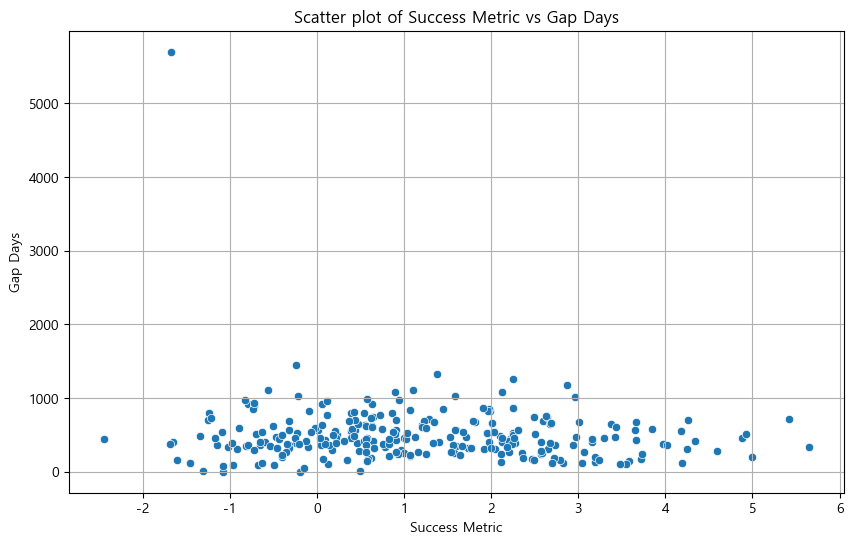

In [38]:
# Scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca', y='average_gap_days', data=merged_data)
plt.title('Scatter plot of Success Metric vs Gap Days')
plt.xlabel('Success Metric')
plt.ylabel('Gap Days')
plt.grid(True)
plt.show()

- term과 성공지표랑은 상관없어 보임
- 시즌의 term은 대부분 0~1000일 사이라는 것을 알 수 있음

In [39]:
merged_data = merged_data[merged_data['average_gap_days'] <= 5000]

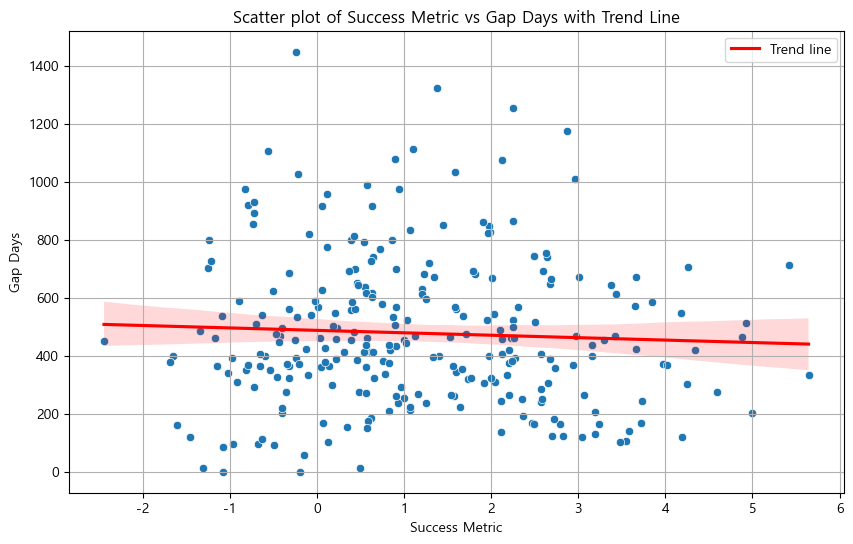

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca', y='average_gap_days', data=merged_data)
sns.regplot(x='pca', y='average_gap_days', data=merged_data, scatter=False, color='red', label='Trend line')
plt.title('Scatter plot of Success Metric vs Gap Days with Trend Line')
plt.xlabel('Success Metric')
plt.ylabel('Gap Days')
plt.legend()
plt.grid(True)
plt.show()